## Feature Selection-Information gain - mutual information In Regression Problem Statements

#### Mutual Information 
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances 

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y)<b>
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [1]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
import pandas as pd
housing_df=pd.read_csv('housing.csv')

In [2]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [20]:
housing_df['PoolQC'].isnull().sum()

1453

In [3]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #colummns belonging to numeric fmimly
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

In [4]:
numerical_cols #columns having numeric data in it

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [5]:
housing_df=housing_df[numerical_cols] #deleting all the objeect column and keeping only numeric columns

In [7]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [25]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [8]:
housing_df=housing_df.drop("Id",axis=1) #id keeping is not necessary

In [10]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split

X = housing_df.drop(labels=['SalePrice'],axis = 1) #independent variable

y = housing_df['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [30]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,65,60,NaN,9375,7,5,1997,1998,573.0,739,...,645,576,36,0,0,0,0,0,2,2009
682,683,120,NaN,2887,6,5,1996,1997,0.0,1003,...,431,307,0,0,0,0,0,0,11,2008
960,961,20,50.0,7207,5,7,1958,2008,0.0,696,...,0,117,0,0,0,0,0,0,2,2010
1384,1385,50,60.0,9060,6,5,1939,1950,0.0,204,...,280,0,0,0,0,0,0,0,10,2009
1100,1101,30,60.0,8400,2,5,1920,1950,0.0,290,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,82.0,9430,8,5,1999,1999,673.0,1163,...,856,0,128,0,0,180,0,0,7,2009
835,836,20,60.0,9600,4,7,1950,1995,0.0,442,...,436,290,0,0,0,0,0,0,2,2010
1216,1217,90,68.0,8930,6,5,1978,1978,0.0,0,...,539,0,0,0,0,0,0,0,4,2010
559,560,120,NaN,3196,7,5,2003,2004,18.0,0,...,420,143,20,0,0,0,0,0,10,2006


In [31]:
X_train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [11]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
X_train = X_train.fillna(0) #filling all num values where ever its present with zero but this is not a goood practice


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 64 to 684
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1022 non-null   int64  
 1   LotFrontage    1022 non-null   float64
 2   LotArea        1022 non-null   int64  
 3   OverallQual    1022 non-null   int64  
 4   OverallCond    1022 non-null   int64  
 5   YearBuilt      1022 non-null   int64  
 6   YearRemodAdd   1022 non-null   int64  
 7   MasVnrArea     1022 non-null   float64
 8   BsmtFinSF1     1022 non-null   int64  
 9   BsmtFinSF2     1022 non-null   int64  
 10  BsmtUnfSF      1022 non-null   int64  
 11  TotalBsmtSF    1022 non-null   int64  
 12  1stFlrSF       1022 non-null   int64  
 13  2ndFlrSF       1022 non-null   int64  
 14  LowQualFinSF   1022 non-null   int64  
 15  GrLivArea      1022 non-null   int64  
 16  BsmtFullBath   1022 non-null   int64  
 17  BsmtHalfBath   1022 non-null   int64  
 18  FullBath

In [13]:
X_train.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [23]:
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.25346649, 0.21364876, 0.16653206, 0.50907501, 0.10639777,
       0.35337382, 0.23848951, 0.09518435, 0.16712173, 0.        ,
       0.11151091, 0.38219297, 0.31066755, 0.22865501, 0.00212834,
       0.47982041, 0.02570805, 0.        , 0.27483462, 0.07175144,
       0.05408126, 0.        , 0.18118522, 0.18123016, 0.26518372,
       0.36667417, 0.36808431, 0.06958218, 0.17200578, 0.00381404,
       0.00254957, 0.021715  , 0.        , 0.00912885, 0.        ,
       0.01347837])

In [16]:
lst = [22,3,3,45,66,77] #datastructure with invisible but usable index

In [17]:
lst

[22, 3, 3, 45, 66, 77]

In [18]:
lst[3]

45

In [19]:
lst

[22, 3, 3, 45, 66, 77]

In [20]:
ser = pd.Series(lst) #data structure with visible and usable index

In [21]:
ser

0    22
1     3
2     3
3    45
4    66
5    77
dtype: int64

In [24]:
mutual_info


array([0.25346649, 0.21364876, 0.16653206, 0.50907501, 0.10639777,
       0.35337382, 0.23848951, 0.09518435, 0.16712173, 0.        ,
       0.11151091, 0.38219297, 0.31066755, 0.22865501, 0.00212834,
       0.47982041, 0.02570805, 0.        , 0.27483462, 0.07175144,
       0.05408126, 0.        , 0.18118522, 0.18123016, 0.26518372,
       0.36667417, 0.36808431, 0.06958218, 0.17200578, 0.00381404,
       0.00254957, 0.021715  , 0.        , 0.00912885, 0.        ,
       0.01347837])

In [25]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,0.0,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,0.0,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,5,1999,1999,673.0,1163,0,...,856,0,128,0,0,180,0,0,7,2009
835,20,60.0,9600,4,7,1950,1995,0.0,442,0,...,436,290,0,0,0,0,0,0,2,2010
1216,90,68.0,8930,6,5,1978,1978,0.0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,120,0.0,3196,7,5,2003,2004,18.0,0,0,...,420,143,20,0,0,0,0,0,10,2006


In [26]:
mutual_info = pd.Series(mutual_info)


In [27]:
mutual_info

0     0.253466
1     0.213649
2     0.166532
3     0.509075
4     0.106398
5     0.353374
6     0.238490
7     0.095184
8     0.167122
9     0.000000
10    0.111511
11    0.382193
12    0.310668
13    0.228655
14    0.002128
15    0.479820
16    0.025708
17    0.000000
18    0.274835
19    0.071751
20    0.054081
21    0.000000
22    0.181185
23    0.181230
24    0.265184
25    0.366674
26    0.368084
27    0.069582
28    0.172006
29    0.003814
30    0.002550
31    0.021715
32    0.000000
33    0.009129
34    0.000000
35    0.013478
dtype: float64

In [28]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [29]:
mutual_info.index = X_train.columns


In [30]:
mutual_info

MSSubClass       0.253466
LotFrontage      0.213649
LotArea          0.166532
OverallQual      0.509075
OverallCond      0.106398
YearBuilt        0.353374
YearRemodAdd     0.238490
MasVnrArea       0.095184
BsmtFinSF1       0.167122
BsmtFinSF2       0.000000
BsmtUnfSF        0.111511
TotalBsmtSF      0.382193
1stFlrSF         0.310668
2ndFlrSF         0.228655
LowQualFinSF     0.002128
GrLivArea        0.479820
BsmtFullBath     0.025708
BsmtHalfBath     0.000000
FullBath         0.274835
HalfBath         0.071751
BedroomAbvGr     0.054081
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.181185
Fireplaces       0.181230
GarageYrBlt      0.265184
GarageCars       0.366674
GarageArea       0.368084
WoodDeckSF       0.069582
OpenPorchSF      0.172006
EnclosedPorch    0.003814
3SsnPorch        0.002550
ScreenPorch      0.021715
PoolArea         0.000000
MiscVal          0.009129
MoSold           0.000000
YrSold           0.013478
dtype: float64

In [31]:
mutual_info.sort_values(ascending=False)

OverallQual      0.509075
GrLivArea        0.479820
TotalBsmtSF      0.382193
GarageArea       0.368084
GarageCars       0.366674
YearBuilt        0.353374
1stFlrSF         0.310668
FullBath         0.274835
GarageYrBlt      0.265184
MSSubClass       0.253466
YearRemodAdd     0.238490
2ndFlrSF         0.228655
LotFrontage      0.213649
Fireplaces       0.181230
TotRmsAbvGrd     0.181185
OpenPorchSF      0.172006
BsmtFinSF1       0.167122
LotArea          0.166532
BsmtUnfSF        0.111511
OverallCond      0.106398
MasVnrArea       0.095184
HalfBath         0.071751
WoodDeckSF       0.069582
BedroomAbvGr     0.054081
BsmtFullBath     0.025708
ScreenPorch      0.021715
YrSold           0.013478
MiscVal          0.009129
EnclosedPorch    0.003814
3SsnPorch        0.002550
LowQualFinSF     0.002128
BsmtFinSF2       0.000000
BsmtHalfBath     0.000000
KitchenAbvGr     0.000000
PoolArea         0.000000
MoSold           0.000000
dtype: float64

In [ ]:
#ascending = False means decending order

<AxesSubplot:>

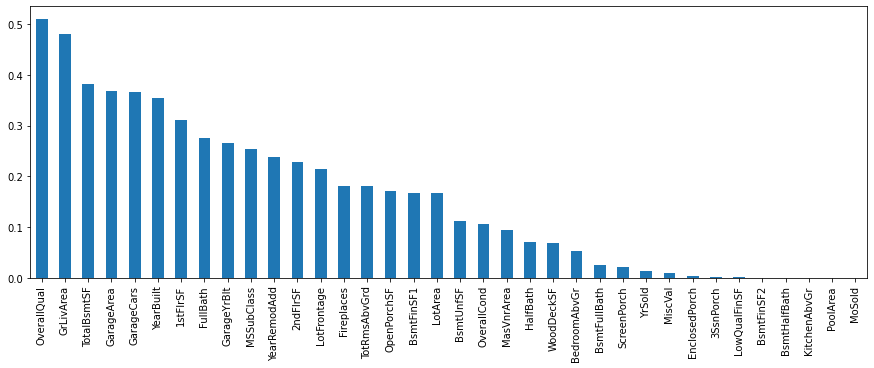

In [32]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))